<div class="alert alert-block alert-info">
<span style="color: rgb(0,53,91);">
<center><img src="https://oci02.img.iteso.mx/Identidades-De-Instancia/ITESO/Logos%20ITESO/Logo-ITESO-Principal-SinFondo.png" style="width:500px;height:142px;" title="Logo ITESO"></center>
<font face = "Times New Roman" size = "6"><b><center>Examen III</center></b></font>
<font face = "Times New Roman" size = "5"><b><center>Laboratorio de procesamiento de datos</center></b></font>
<br>
<!-- <br> -->


<b><font face = "Times New Roman" size = "4"><center> </center></font>
<!-- <font face = "Times New Roman" size = "4"><center>Subtema c: x</center></font></b> -->
<div align="right"><font face = "Times New Roman" size = "2">Ubaldo Neri</font></div>
<div align="right"><font face = "Times New Roman" size = "2">Eduardo Martínez</font></div>
<div align="right"><font face = "Times New Roman" size = "2">Demien Becerra</font></div>
</span></div>

### Instrucciones

A continuación los pasos a realizar. Lee con atención  y responde en tu notebook lo que se pide: 

1. Tomar el dataset dado.
2. Hacer un análisis descriptivo y agrupado de los datos. De este punto se espera que el alumno identifique las carencias de la base (información faltante y/o mal presentada) así como el potencial de las variables predictoras hacia la variable de respuesta (`client_stayed`).
    - Este punto trata de analizar el estado en el cual se recibe el conjunto de datos **y explicarlo de manera somera pero con gráficos/tablas que soporten conclusiones preliminares**.
        - Nota: Solamente nombrar columnas o decir que hay X números NO es un análisis descriptivo EDA.
    - Hacer análisis cruzados: Análisis entre varias variables y no solo de manera individual. **Se espera que hagas estos análisis y expliques qué se hace y qué observas en cada uno**.
3. Preprocesar los datos.
    - Se espera que se limpien y/o estandaricen según sea necesario en este punto del proceso.
    - Rellenar información faltante.
      - Explicar el porqué del método elegido.
      - Evaluar los impactos en el conjunto de datos del método elegido. Responder:
          - ¿La variable después de rellenar cambió su distribución de alguna forma?
          - ¿Cambiaron estadísticos como el promedio y la desviación estándar de la variable?
          - ¿Cambió la correlación de la variable con la variable objetivo?
    - Generar un proceso de feature engineering.
        - Crear nuevas variables a partir de las existentes Se deben de crear al menos 5 variables y agregarlas al DataFrame para poder hacer los análisis subsecuentes. Para cada variable creada responder: 
            - ¿Cuál es tu hipótesis? ¿Por qué esa variable puede servir?
            - Después de observar el potencial de la variable explica su comportamiento. ¿Qué observas de tu variable al ser comparada con la variable de respuesta?
        - **Se debe de cuidar que no haya leakage en ninguna de las variables producidas**.
    - Generar un proceso de selección de variables.
        - Se debe de escoger entre al menos una de las siguientes opciones:
            - Varianza.
            - Correlaciones.
            - Coeficientes de una regresión logística.
        - Responder:
            - ¿Cómo se implementó el método utilizado? 
            - ¿Por qué se escogió este método?
            - ¿Qué variables se van a seleccionar con el método?
            - ¿**Cómo puedo demostrar** que las variables elegidas son mejores que las no elegidas?
            - ¿Algunas de las variables generadas con el punto b quedaron elegidas? ¿Por qué?


### Variables

A continuación se adjunta una descripción breve de las variables y de su contenido.

1. `Clientnum`: Id único para el cliente.

2. `Client_stayed`: **Variable de respuesta**. Es 1 si el cliente sigue con el banco o 0 si el cliente decidió dejar de ser cliente.

3. `Customer_age`: Edad del cliente medida en años.

4. `Gender`: Género del cliente. `M` para hombres y `F` para mujeres.

5. `Dependent_count`: Número de dependientes económicos del cliente.

6. `Education_level`: Escolaridad del cliente.

7. `Marital_status`: Estado civil del cliente.

8. `Income_category`: El banco no cuenta con los salarios exactos de los clientes, por lo que esta variable representa un aproximado medio del salario del mismo medido en dólares estadounidenses.

9. `Card_category`: Tipo de instrumento de crédito que tiene el cliente.

10. `Months_on_book`: Periodo en el que el cliente ha estado activo (desde la activación de su instrumento de crédito).

11. `Total_relationship_count`: Número de productos del banco que tiene el cliente. El cliente no está limitado a solo tener su instrumento de crédito, puede tener relación con otras áreas del banco.

12. `Months_inactive_12_mon`: Número de meses que el cliente ha dejado de utilizar su instrumento de crédito en los últimos 12 meses.

13. `Contacts_count_12_mon`: Número de contactos telefónicos que ha hecho el cliente al banco en los últimos 12 meses.

14. `Credit_limit`: Límite del instrumento crediticio medido en dólares estadounidenses.

15. `Total_revolving_bal`: Balance total del instrumento crediticio (cantidad a pagar por el cliente).

16. `Total_trans_amt`: Dinero transaccionado a través del instrumento crediticio en los últimos 12 meses.

17. `Total_trans_ct`: Número de transacciones realizadas a través del instrumento crediticio en los últimos 12 meses.



### Imports

In [162]:
import os
import re
import warnings
from copy import deepcopy

import pandas as pd
import numpy as np

from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('Estilo/toutl.mplstyle')
from style import *

In [163]:
df=pd.read_csv('Datos/examen3.csv')

### Datos


In [164]:
display(df.head())
df.info()

,clientnum,client_stayed,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,total_trans_amt,total_trans_ct
0,768805383,1,45,M,3,High School,Married,5833.333333333333,Blue,39,5,1,3,12691.0,777,1144,42
1,818770008,1,49,F,5,Graduate,Single,1666.6666666666667,Blue,44,6,1,2,8256.0,864,1291,33
2,713982108,1,51,M,3,Graduate,Married,8333.333333333334,Blue,36,4,1,0,3418.0,0,1887,20
3,769911858,1,40,F,4,High School,Unknown,1666.6666666666667,Blue,34,3,4,1,3313.0,2517,1171,20
4,709106358,1,40,M,3,Uneducated,Married,5833.333333333333,Blue,21,5,1,0,4716.0,0,816,28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   clientnum                 10127 non-null  int64  
 1   client_stayed             10127 non-null  int64  
 2   customer_age              10127 non-null  int64  
 3   gender                    10127 non-null  object 
 4   dependent_count           10127 non-null  int64  
 5   education_level           10127 non-null  object 
 6   marital_status            10127 non-null  object 
 7   income_category           10127 non-null  object 
 8   card_category             10127 non-null  object 
 9   months_on_book            10127 non-null  int64  
 10  total_relationship_count  10127 non-null  int64  
 11  months_inactive_12_mon    10127 non-null  int64  
 12  contacts_count_12_mon     10127 non-null  int64  
 13  credit_limit              10127 non-null  float64
 14  total_

In [165]:
df.nunique()

clientnum                   10127
client_stayed                   2
customer_age                   45
gender                          2
dependent_count                 6
education_level                 7
marital_status                  4
income_category                 6
card_category                   4
months_on_book                 44
total_relationship_count        6
months_inactive_12_mon          7
contacts_count_12_mon           7
credit_limit                 6205
total_revolving_bal          1974
total_trans_amt              5033
total_trans_ct                126
dtype: int64

Aqui podemos ver las granualidades de las variables

In [166]:
# clientum parece ser el ID del cliente, entonces lo dropeamos
if "clientnum" in df.columns:
    df = df.drop(["clientnum"], axis=1)

In [167]:
display(df.describe(include='O'))
df.describe()

,gender,education_level,marital_status,income_category,card_category
count,10127,10127,10127,10127,10127
unique,2,7,4,6,4
top,F,Graduate,Married,1666.6666666666667,Blue
freq,5358,3128,4687,3561,9436


,client_stayed,customer_age,dependent_count,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,total_trans_amt,total_trans_ct
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,0.839340,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,4404.086304,64.858695
std,0.367235,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,3397.129254,23.472570
min,0.000000,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,510.000000,10.000000
25%,1.000000,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,2155.500000,45.000000
50%,1.000000,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3899.000000,67.000000
75%,1.000000,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,4741.000000,81.000000
max,1.000000,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,18484.000000,139.000000


In [168]:
granularidad = df.nunique()
granularidad

client_stayed                  2
customer_age                  45
gender                         2
dependent_count                6
education_level                7
marital_status                 4
income_category                6
card_category                  4
months_on_book                44
total_relationship_count       6
months_inactive_12_mon         7
contacts_count_12_mon          7
credit_limit                6205
total_revolving_bal         1974
total_trans_amt             5033
total_trans_ct               126
dtype: int64

In [169]:
cols_baja = [col for col in df.columns if granularidad[col] < 10]  # Variables categóricas o numéricas discretas
cols_alta = [col for col in df.columns if granularidad[col] > 10] # Variables continuas
 
granularidad_baja = df[cols_baja]
granularidad_alta = df[['client_stayed'] + cols_alta]

display(granularidad_alta.head())
display(granularidad_baja.head())

,client_stayed,customer_age,months_on_book,credit_limit,total_revolving_bal,total_trans_amt,total_trans_ct
0,1,45,39,12691.0,777,1144,42
1,1,49,44,8256.0,864,1291,33
2,1,51,36,3418.0,0,1887,20
3,1,40,34,3313.0,2517,1171,20
4,1,40,21,4716.0,0,816,28


,client_stayed,gender,dependent_count,education_level,marital_status,income_category,card_category,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon
0,1,M,3,High School,Married,5833.333333333333,Blue,5,1,3
1,1,F,5,Graduate,Single,1666.6666666666667,Blue,6,1,2
2,1,M,3,Graduate,Married,8333.333333333334,Blue,4,1,0
3,1,F,4,High School,Unknown,1666.6666666666667,Blue,3,4,1
4,1,M,3,Uneducated,Married,5833.333333333333,Blue,5,1,0


In [170]:
# Cantidad y proporción de la variable de respuesta
print(df['client_stayed'].value_counts())
display(df['client_stayed'].value_counts(normalize=True))

client_stayed
1    8500
0    1627
Name: count, dtype: int64


client_stayed
1    0.83934
0    0.16066
Name: proportion, dtype: float64

### Distribuciones

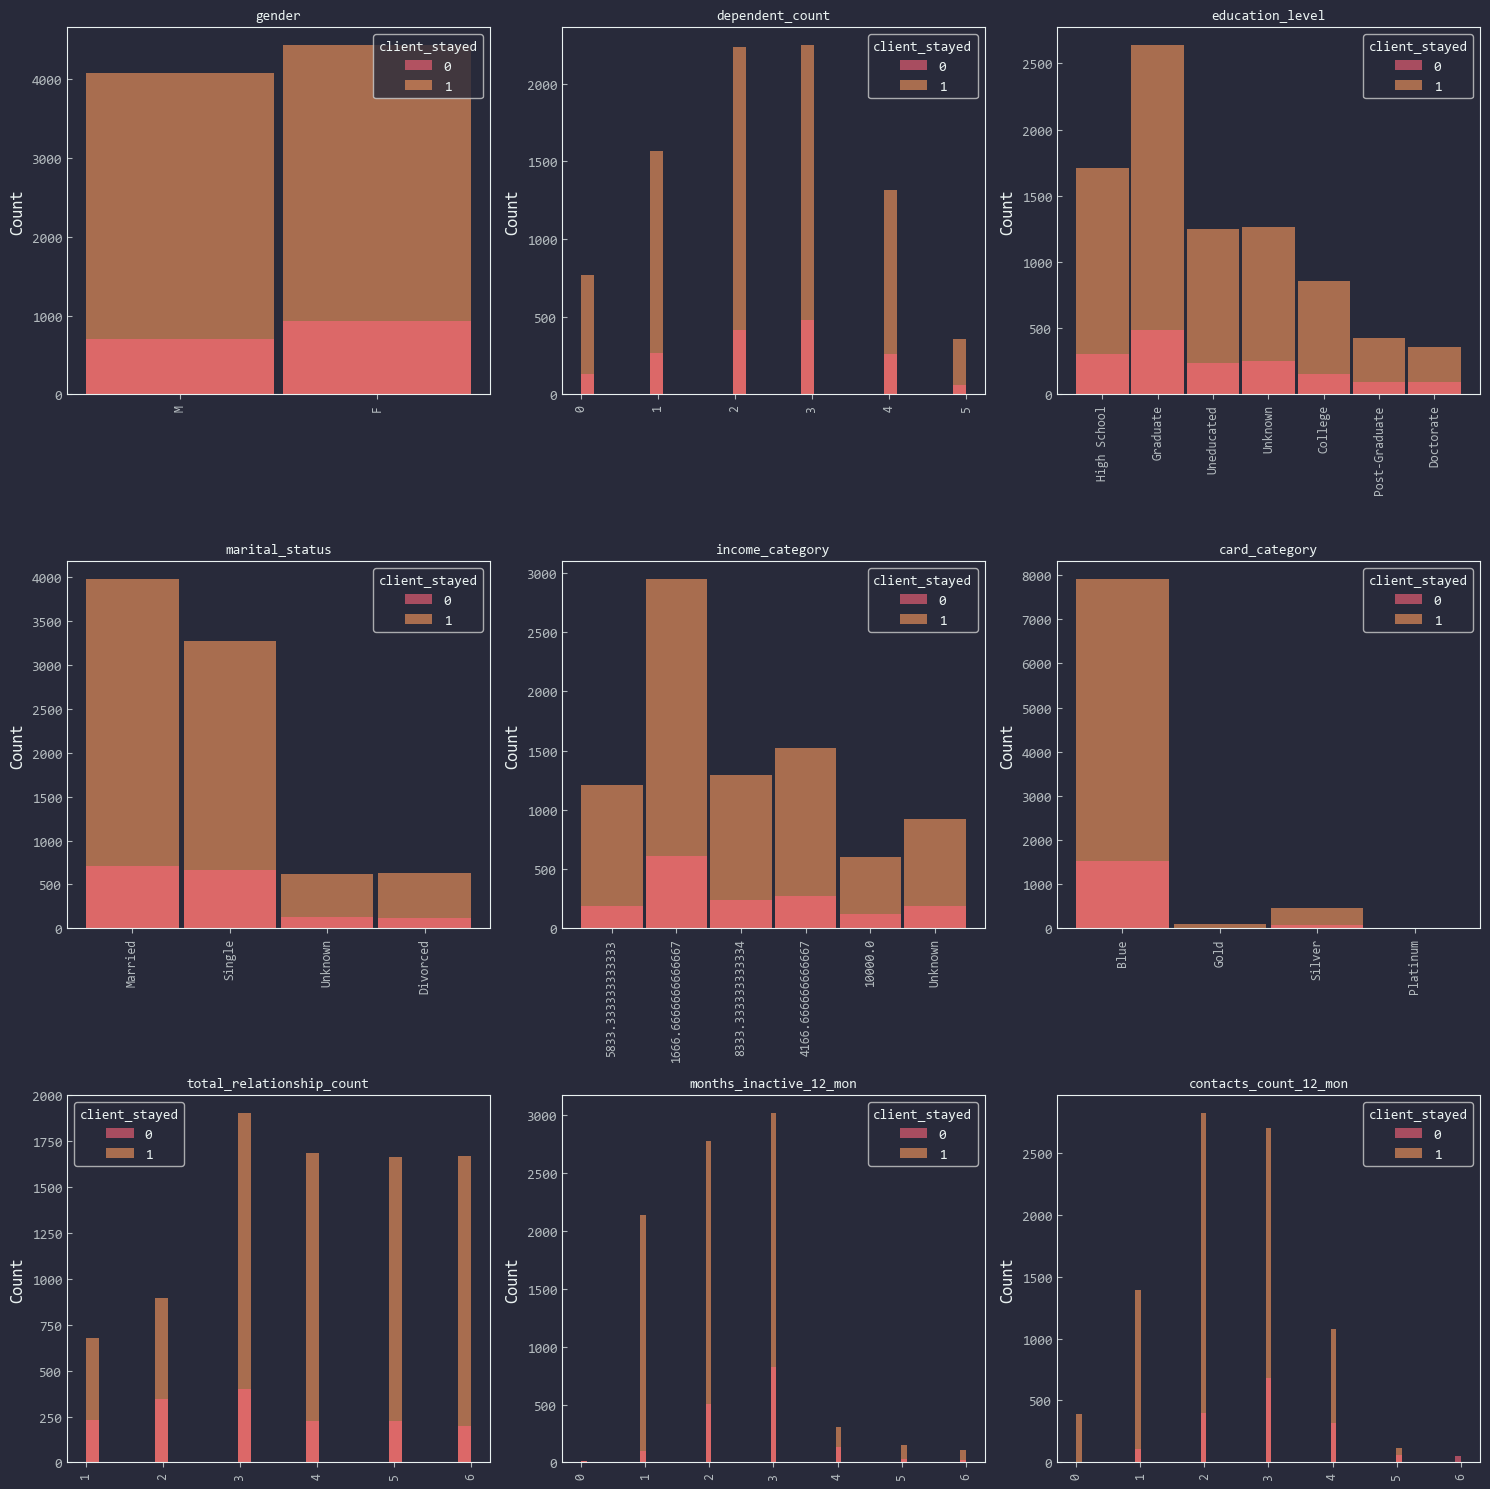

In [171]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

for ax, column in zip(axes.flat, granularidad_baja.columns[1:]):
    sns.histplot(data=df, x=column, hue='client_stayed', ax=ax,
                 alpha=0.6, edgecolor='none', shrink=0.95)
    ax.tick_params(axis='x', labelrotation=90, labelsize=9)
    ax.set_title(column, fontsize=10)
    ax.set_xlabel('')

plt.tight_layout()

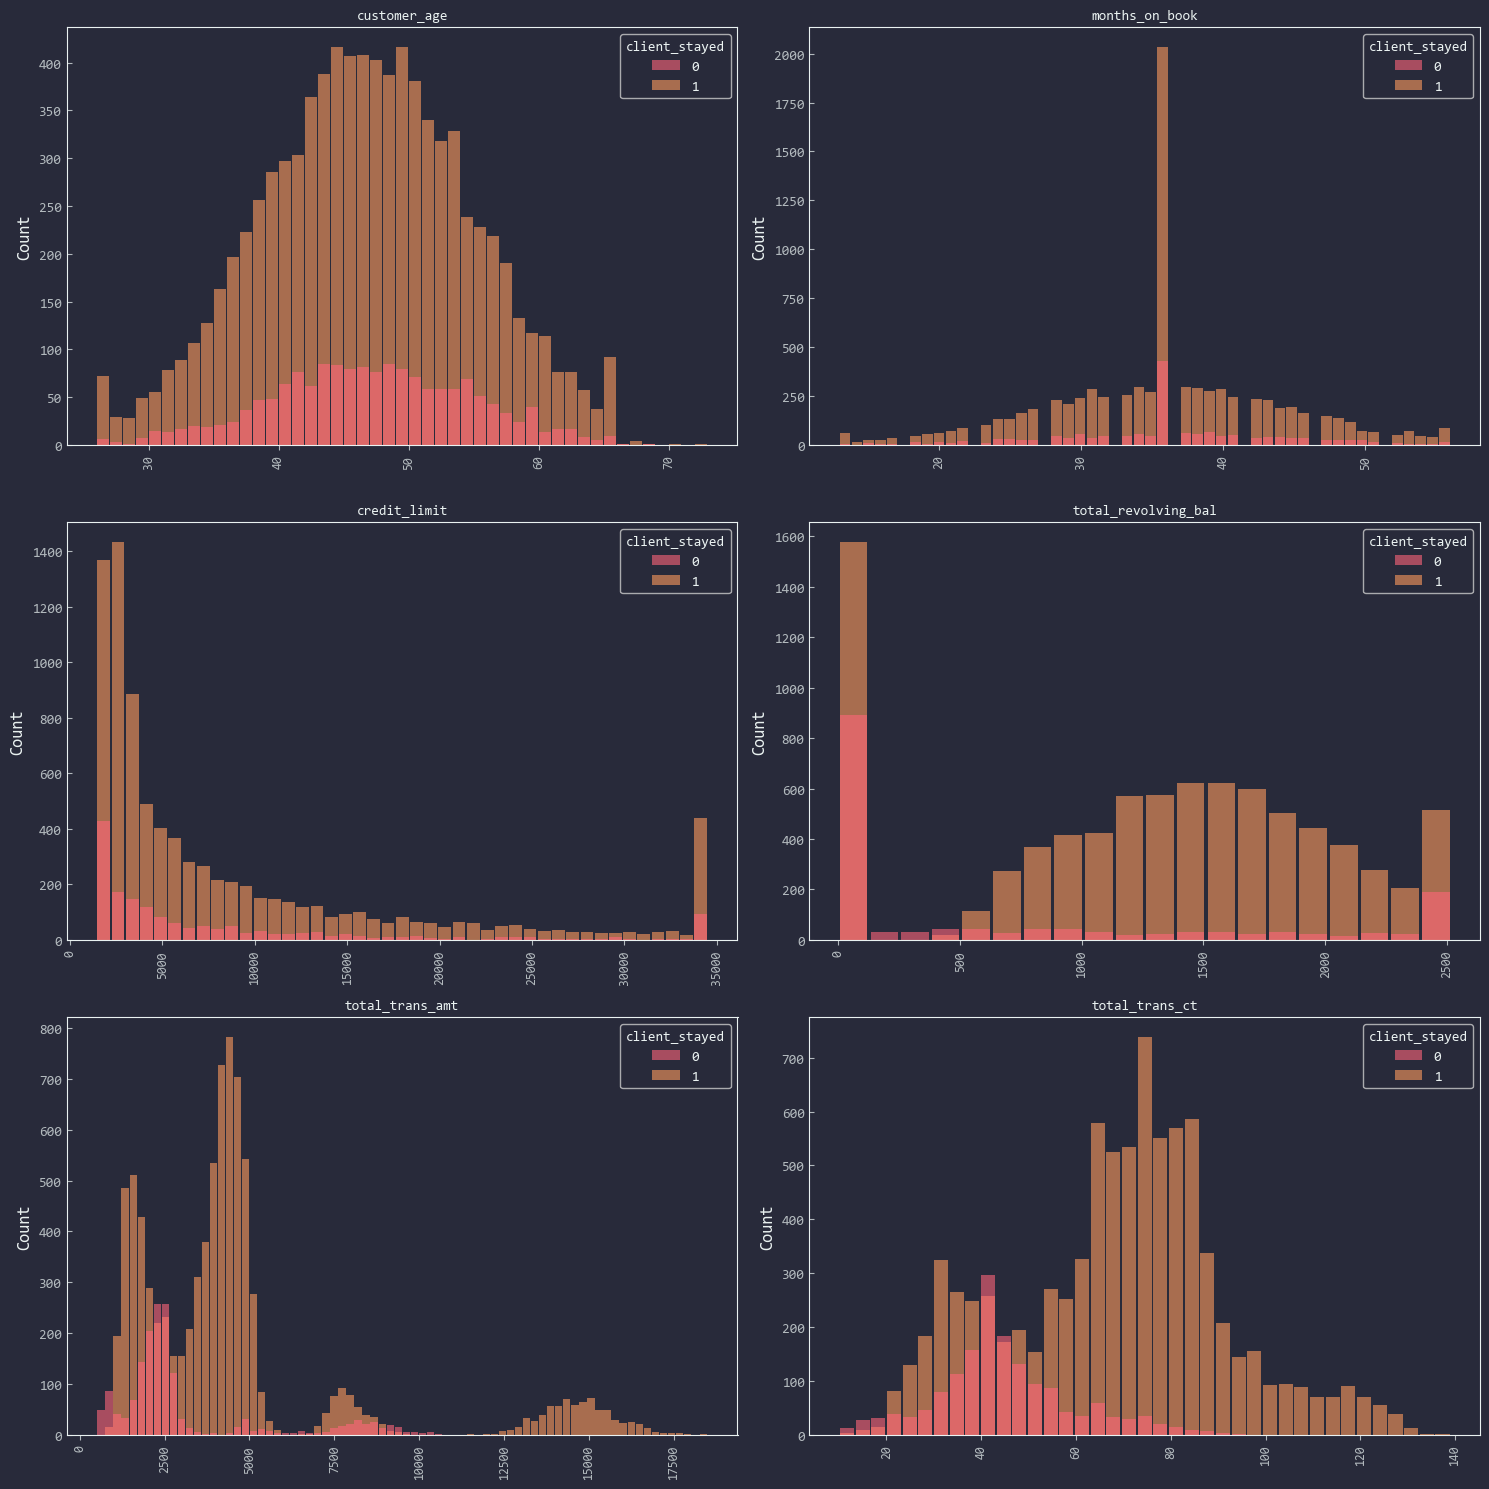

In [172]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

for ax, column in zip(axes.flat, granularidad_alta.columns[1:]):
    sns.histplot(data=df, x=column, hue='client_stayed', ax=ax,
                 alpha=0.6, edgecolor='none', shrink=0.9)
    ax.tick_params(axis='x', labelrotation=90, labelsize=9)
    ax.set_title(column, fontsize=10)
    ax.set_xlabel('')

plt.tight_layout()


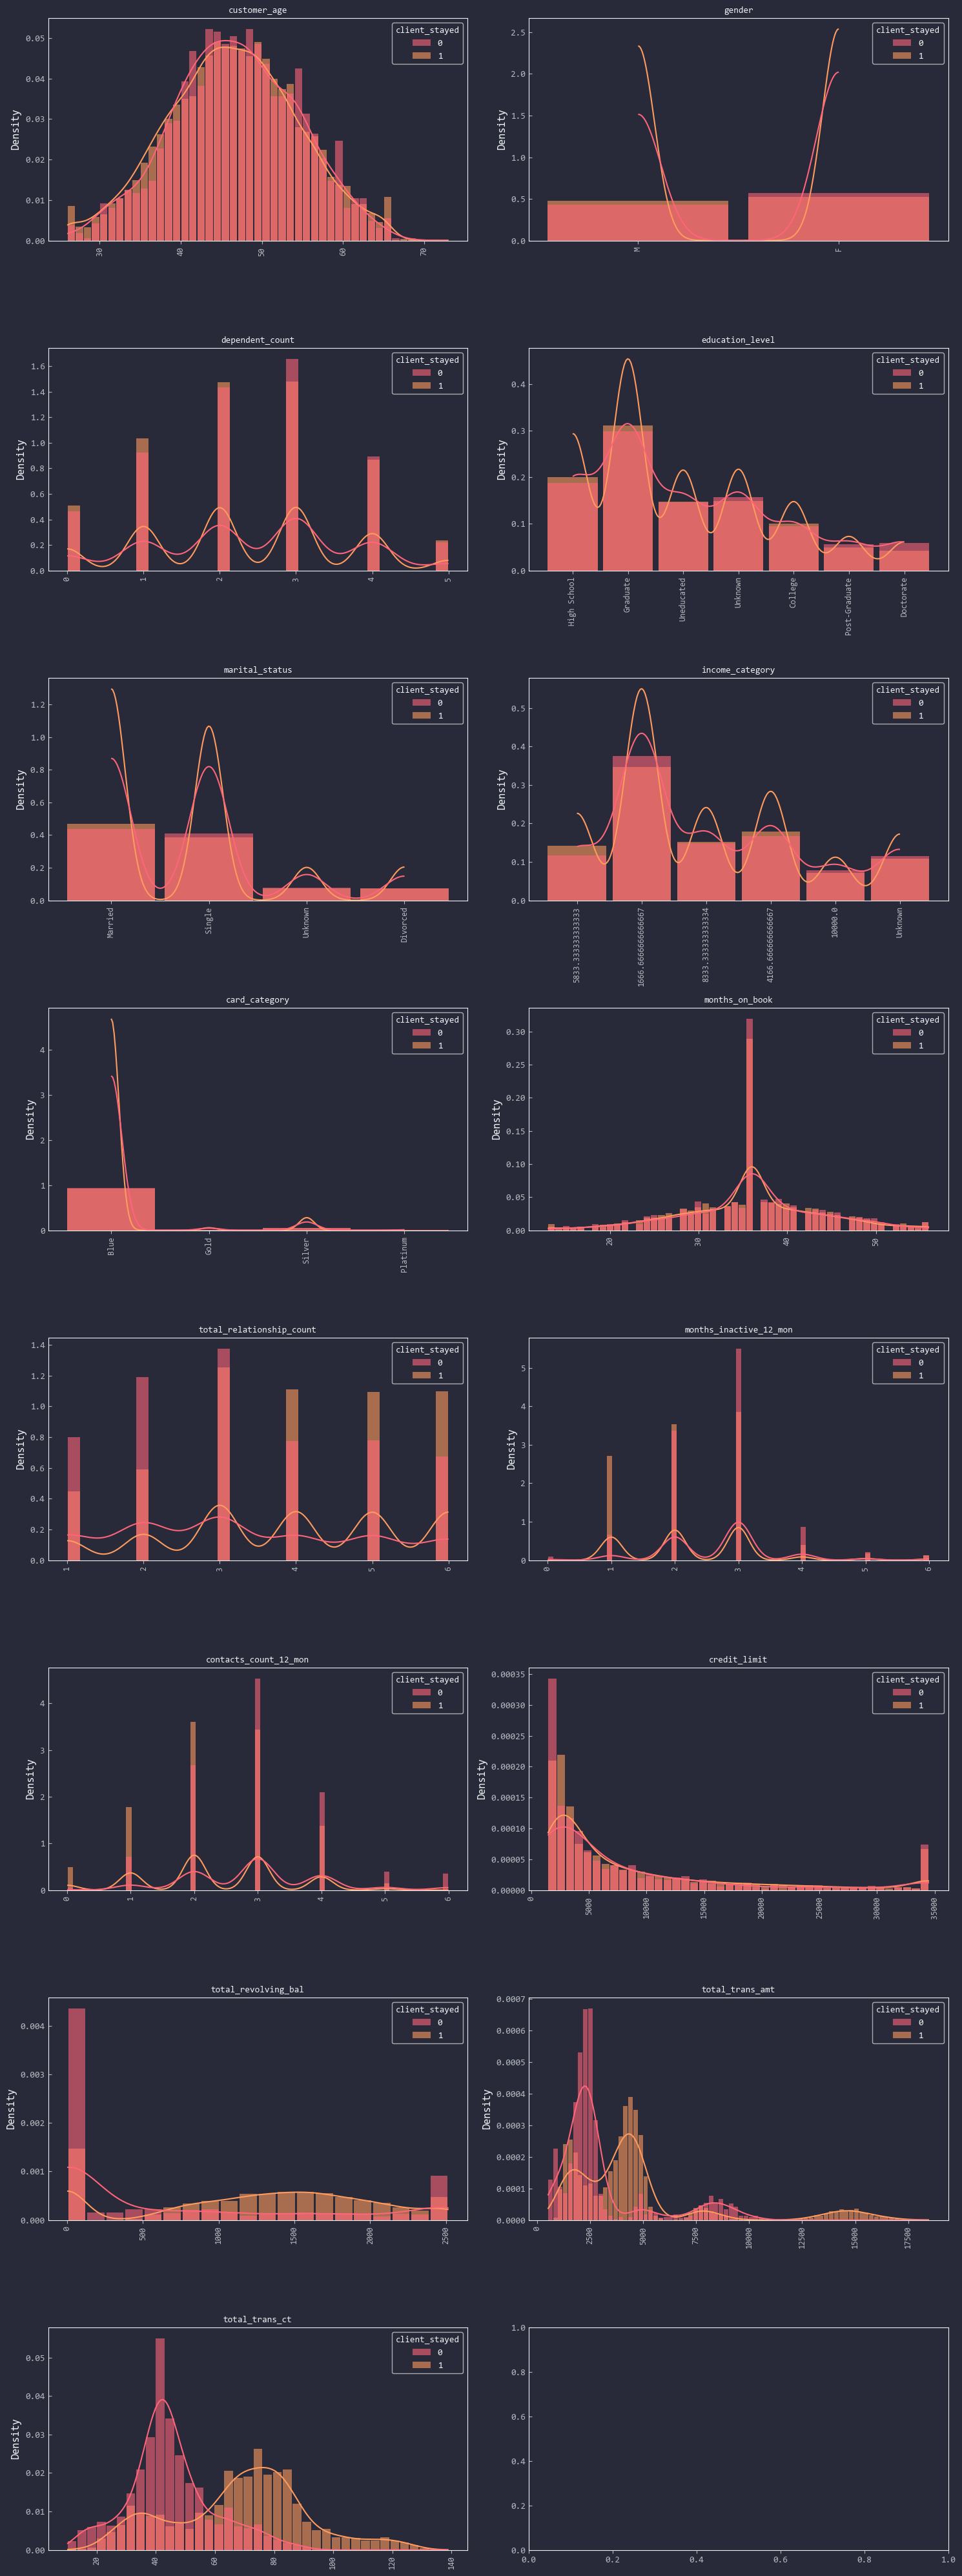

In [139]:
fig, axes = plt.subplots(8, 2, figsize=(15, 40))

for ax, column in zip(axes.flat, df.columns[1:]):
    sns.histplot(data=df, x=column, hue='client_stayed', ax=ax,
                 alpha=0.6, edgecolor='none', shrink=0.9,
                 kde=True, stat='density', common_norm=False)
    ax.tick_params(axis='x', labelrotation=90, labelsize=9)
    ax.set_title(column, fontsize=10)
    ax.set_xlabel('')

plt.tight_layout()

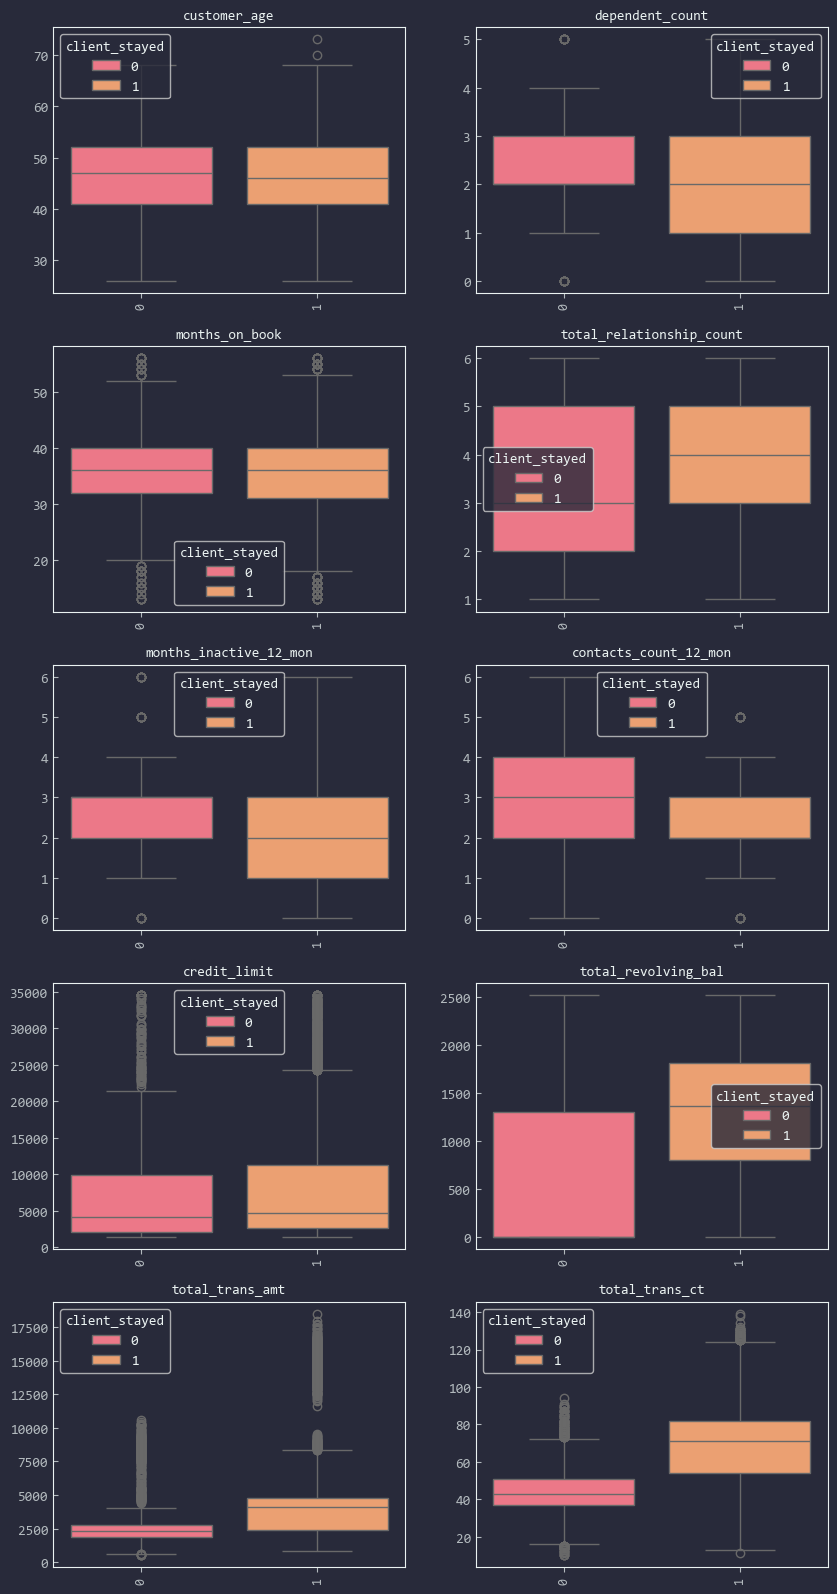

In [140]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('client_stayed')

fig, axes = plt.subplots(5, 2, figsize=(10, 20))

for ax, column in zip(axes.flat, numeric_cols):
    sns.boxplot(
        data=df,
        x='client_stayed',  
        y=column,
        hue='client_stayed',  
        dodge=False,        
        ax=ax
    )
    ax.tick_params(axis='x', labelrotation=90, labelsize=9)
    ax.set_title(column, fontsize=10)
    ax.set_xlabel('')
    ax.set_ylabel('')

In [141]:
# Cantidad y proporción de la variable de respuesta
display(df['client_stayed'].value_counts())
display(df['client_stayed'].value_counts(normalize=True) * 100)

client_stayed
1    8500
0    1627
Name: count, dtype: int64

client_stayed
1    83.934038
0    16.065962
Name: proportion, dtype: float64

In [142]:
granularidad_por_grupo = df.groupby('client_stayed').nunique().transpose()
granularidad_por_grupo

client_stayed,0,1
customer_age,42,45
gender,2,2
dependent_count,6,6
education_level,7,7
marital_status,4,4
income_category,6,6
card_category,4,4
months_on_book,44,44
total_relationship_count,6,6
months_inactive_12_mon,7,7


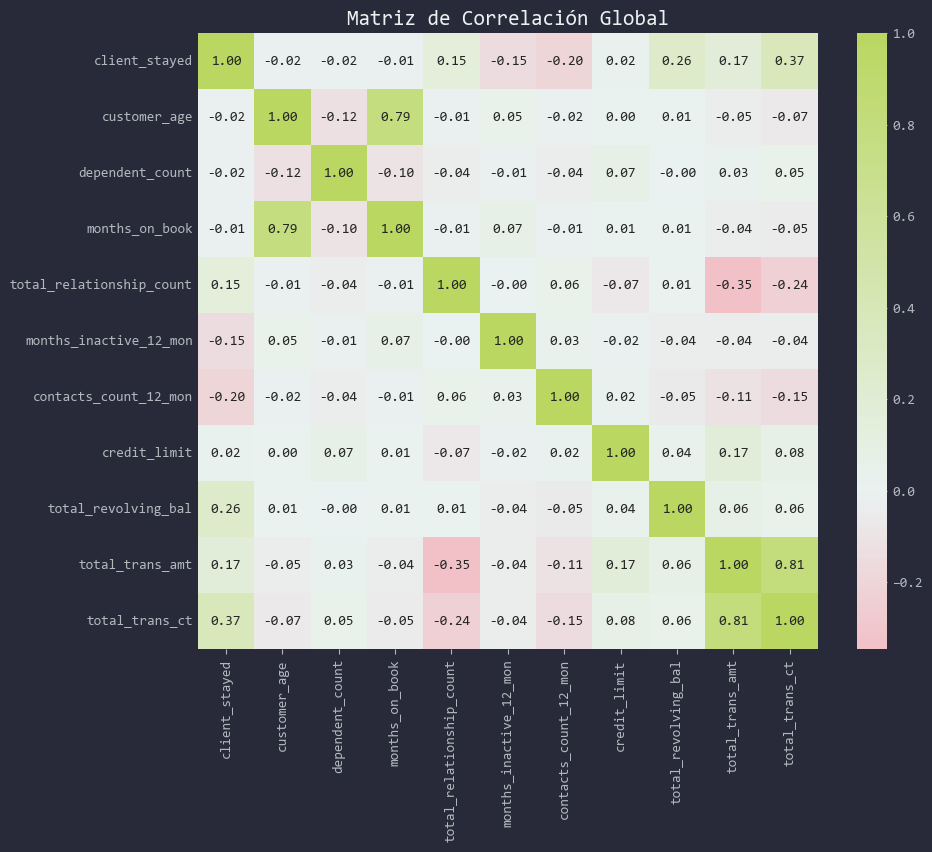

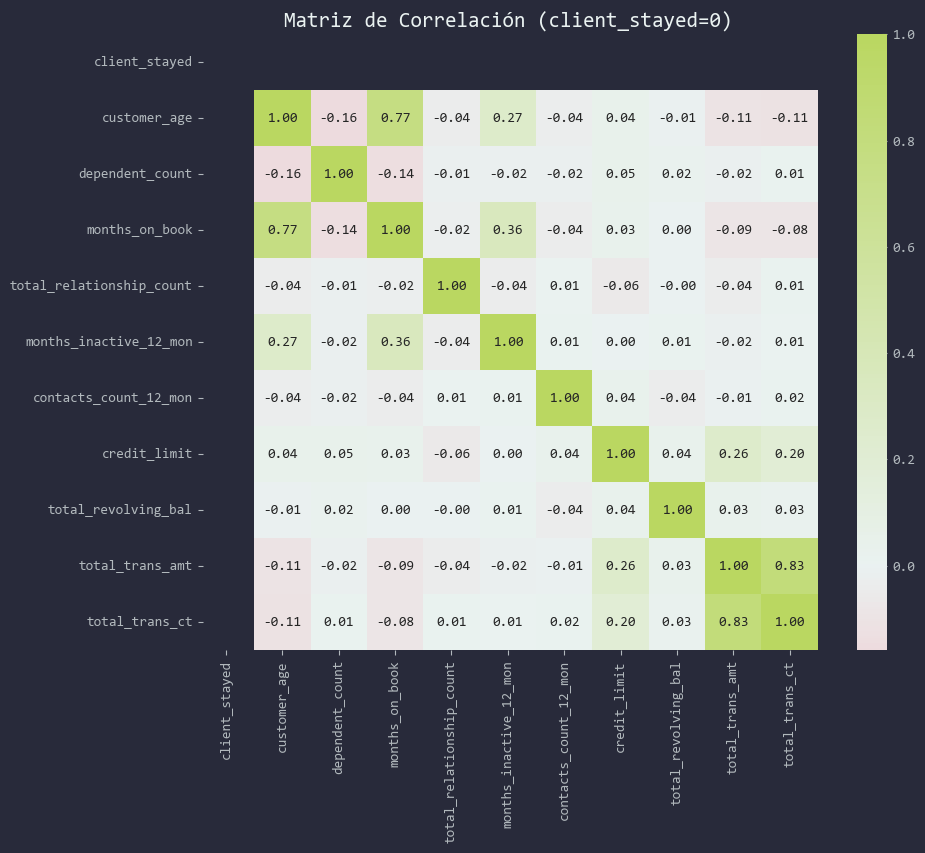

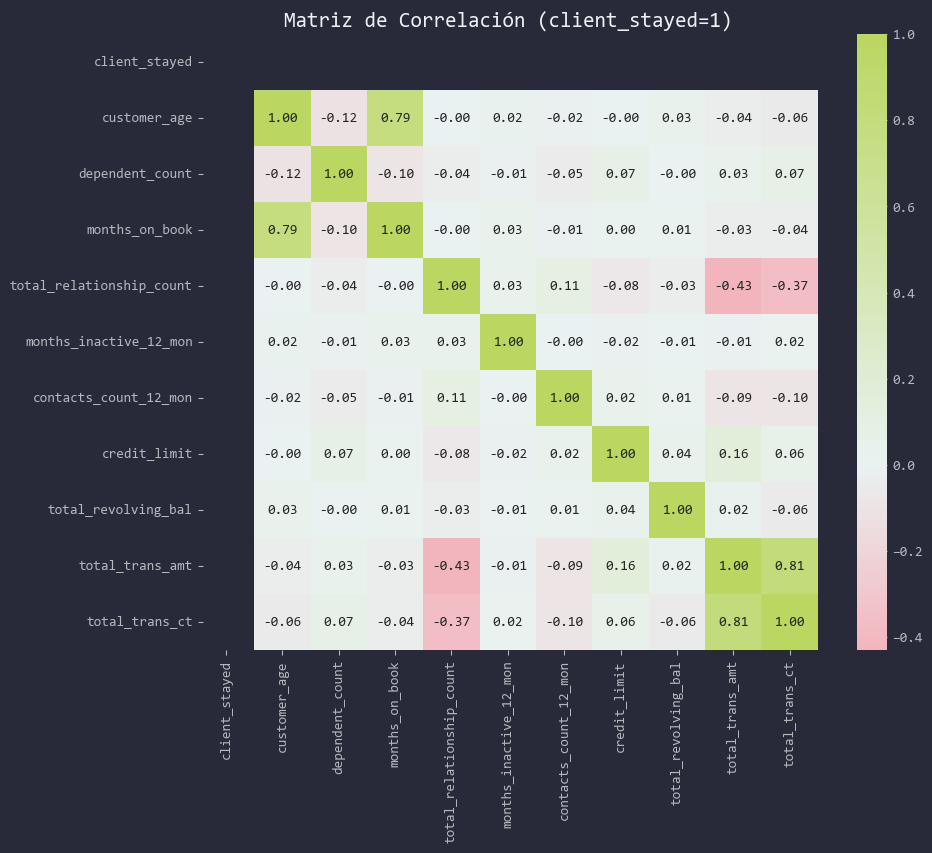

In [143]:
mapa = TOUTL_PALETTES["diverging"]
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

group_0 = df[df['client_stayed'] == 0][numeric_cols]
group_1 = df[df['client_stayed'] == 1][numeric_cols]
                                       
corr_global = df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_global, annot=True, cmap=mapa, fmt=".2f", center=0)
plt.title("Matriz de Correlación Global")
plt.show()

corr_group0 = group_0.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_group0, annot=True, cmap=mapa, fmt=".2f", center=0)
plt.title("Matriz de Correlación (client_stayed=0)")
plt.show()

corr_group1 = group_1.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_group1, annot=True, cmap=mapa, fmt=".2f", center=0)
plt.title("Matriz de Correlación (client_stayed=1)")
plt.show()

#### Unknown aparece en tres variables

In [144]:
var_unknown = ["education_level", "marital_status", "income_category"]

df_vu = df[["client_stayed"] + var_unknown]
display(df_vu.head())

,client_stayed,education_level,marital_status,income_category
0,1,High School,Married,5833.333333333333
1,1,Graduate,Single,1666.6666666666667
2,1,Graduate,Married,8333.333333333334
3,1,High School,Unknown,1666.6666666666667
4,1,Uneducated,Married,5833.333333333333


In [145]:
results = {}

for var in var_unknown:
    proportions = df_vu.groupby(var)['client_stayed'].value_counts(normalize=True).unstack()
    
    results[var] = proportions
    
    print(f"\n=== Proportions by {var} ===")
    display(proportions.round(3))


=== Proportions by education_level ===


client_stayed,0,1
education_level,,
College,0.152,0.848
Doctorate,0.211,0.789
Graduate,0.156,0.844
High School,0.152,0.848
Post-Graduate,0.178,0.822
Uneducated,0.159,0.841
Unknown,0.169,0.831



=== Proportions by marital_status ===


client_stayed,0,1
marital_status,,
Divorced,0.162,0.838
Married,0.151,0.849
Single,0.169,0.831
Unknown,0.172,0.828



=== Proportions by income_category ===


client_stayed,0,1
income_category,,
10000.0,0.173,0.827
1666.6666666666667,0.172,0.828
4166.666666666667,0.151,0.849
5833.333333333333,0.135,0.865
8333.333333333334,0.158,0.842
Unknown,0.168,0.832


In [146]:
for var in var_unknown:
    print(df[var].value_counts(normalize=True)['Unknown'])

0.14999506270366347
0.07396069912116125
0.10980547052434086


In [147]:
for var in var_unknown:
    unknown_prop = results[var].loc['Unknown']
    other_prop = results[var].drop('Unknown').mean()

    print(var,f"Unknown: {unknown_prop[1]:.1%} stayed (1) vs. Known avg: {other_prop[1]:.1%} stayed")
 

education_level Unknown: 83.1% stayed (1) vs. Known avg: 83.2% stayed
marital_status Unknown: 82.8% stayed (1) vs. Known avg: 83.9% stayed
income_category Unknown: 83.2% stayed (1) vs. Known avg: 84.2% stayed


## Outliers

In [148]:
columnas_analizar = df.select_dtypes(include=['int64', 'float64']).drop(columns=['client_stayed'], errors='ignore').columns.tolist()

def generar_reporte_outliers(df, columnas):
    print("\n" + "="*92)
    print(f"{'REPORTE DE OUTLIERS - ANÁLISIS COMPLETO':^92}")
    print("="*92)
    print(f"{'Columna':<25} {'Tipo':<10} {'Outliers':>10} {'%':>8} {'L. Inferior':>15} {'L. Superior':>15}")
    print("-"*92)
    
    for col in columnas:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lim_inf = Q1 - 1.5 * IQR
        lim_sup = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lim_inf) | (df[col] > lim_sup)]
        n_outliers = len(outliers)
        pct_outliers = (n_outliers/len(df))*100
        
        str_lim_inf = f"{lim_inf:,.2f}" if isinstance(lim_inf, float) else f"{int(lim_inf):,}"
        str_lim_sup = f"{lim_sup:,.2f}" if isinstance(lim_sup, float) else f"{int(lim_sup):,}"
        
        print(f"{col:<25} {str(df[col].dtype):<10} {n_outliers:>10,} {pct_outliers:>7.2f}% {str_lim_inf:>15} {str_lim_sup:>15}")

    print("="*92)

generar_reporte_outliers(df, columnas_analizar)


                          REPORTE DE OUTLIERS - ANÁLISIS COMPLETO                           
Columna                   Tipo         Outliers        %     L. Inferior     L. Superior
--------------------------------------------------------------------------------------------
customer_age              int64               2    0.02%           24.50           68.50
dependent_count           int64               0    0.00%           -2.00            6.00
months_on_book            int64             386    3.81%           17.50           53.50
total_relationship_count  int64               0    0.00%            0.00            8.00
months_inactive_12_mon    int64             331    3.27%            0.50            4.50
contacts_count_12_mon     int64             629    6.21%            0.50            4.50
credit_limit              float64           984    9.72%      -10,213.75       23,836.25
total_revolving_bal       int64               0    0.00%       -1,778.50        3,921.50
total_trans_

In [149]:

def generar_reporte_outliers_por_grupo(df, columnas, grupo_col='client_stayed'):
    col_width = 22
    type_width = 10
    outliers_width = 10
    pct_width = 8
    limit_width = 15
    
    for grupo in sorted(df[grupo_col].unique()):
        print(f"\n{'ANÁLISIS PARA CLIENT_STAYED =':<20} {grupo}")
        print("-"*100)
        print(f"{'Columna':<{col_width}} {'Tipo':<{type_width}} {'Outliers':>{outliers_width}} "
              f"{'%':>{pct_width}} {'L. Inferior':>{limit_width}} {'L. Superior':>{limit_width}}")
        print("-"*100)
        
        grupo_df = df[df[grupo_col] == grupo]
        
        for col in columnas:
            Q1 = grupo_df[col].quantile(0.25)
            Q3 = grupo_df[col].quantile(0.75)
            IQR = Q3 - Q1
            lim_inf = Q1 - 1.5 * IQR
            lim_sup = Q3 + 1.5 * IQR
            
            outliers = grupo_df[(grupo_df[col] < lim_inf) | (grupo_df[col] > lim_sup)]
            n_outliers = len(outliers)
            pct_outliers = (n_outliers/len(grupo_df))*100
            
            is_float = isinstance(grupo_df[col].iloc[0], float)
            fmt_lim = "{:,.2f}" if is_float else "{:,}"
            
            print(f"{col:<{col_width}} {str(grupo_df[col].dtype):<{type_width}} "
                  f"{n_outliers:>{outliers_width},} {pct_outliers:>{pct_width-1}.2f}% "
                  f"{fmt_lim.format(lim_inf):>{limit_width}} {fmt_lim.format(lim_sup):>{limit_width}}")
    
    print("="*100)

generar_reporte_outliers_por_grupo(df, columnas_analizar)


ANÁLISIS PARA CLIENT_STAYED = 0
----------------------------------------------------------------------------------------------------
Columna                Tipo         Outliers        %     L. Inferior     L. Superior
----------------------------------------------------------------------------------------------------
customer_age           int64               0    0.00%            24.5            68.5
dependent_count        int64             199   12.23%             0.5             4.5
months_on_book         int64              77    4.73%            20.0            52.0
total_relationship_count int64               0    0.00%            -2.5             9.5
months_inactive_12_mon int64              66    4.06%             0.5             4.5
contacts_count_12_mon  int64               0    0.00%            -1.0             7.0
credit_limit           float64           173   10.63%       -9,615.25       21,662.75
total_revolving_bal    int64               0    0.00%       -1,955.25      

In [150]:
def agregar_columna_vip(df, columna_credito='credit_limit', grupo_col='client_stayed', 
                        metodo='IQR', umbral=1.5, inplace=False):
    
    if not inplace:
        df = df.copy()
    
    
    df['vip'] = 0
    
    for grupo in df[grupo_col].unique():
        mascara_grupo = df[grupo_col] == grupo
        datos_credito = df.loc[mascara_grupo, columna_credito]
        
        
        if metodo == 'IQR':
            Q1 = datos_credito.quantile(0.25)
            Q3 = datos_credito.quantile(0.75)
            IQR = Q3 - Q1
            limite_superior = Q3 + umbral * IQR
        elif metodo == 'zscore':
            mediana = datos_credito.median()
            mad = np.median(np.abs(datos_credito - mediana))
            limite_superior = mediana + umbral * mad / 0.6745
        else:
            raise ValueError("Método debe ser 'IQR' o 'zscore'")
        
      
        df.loc[(mascara_grupo) & (df[columna_credito] > limite_superior), 'vip'] = 1
    
    
    total_vips = df['vip'].sum()
    print(f"Total clientes VIP identificados: {total_vips}")
    print("\nDistribución de VIPs por grupo:")
    print(pd.crosstab(df[grupo_col], df['vip'], margins=True))
    
    if not inplace:
        return df

In [151]:
df_nuevo = agregar_columna_vip(
    df=df,
    columna_credito='credit_limit',
    grupo_col='client_stayed',
    metodo='IQR',
    umbral=1.5
)
df

Total clientes VIP identificados: 967

Distribución de VIPs por grupo:
vip               0    1    All
client_stayed                  
0              1454  173   1627
1              7706  794   8500
All            9160  967  10127


,client_stayed,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,total_trans_amt,total_trans_ct
0,1,45,M,3,High School,Married,5833.333333333333,Blue,39,5,1,3,12691.0,777,1144,42
1,1,49,F,5,Graduate,Single,1666.6666666666667,Blue,44,6,1,2,8256.0,864,1291,33
2,1,51,M,3,Graduate,Married,8333.333333333334,Blue,36,4,1,0,3418.0,0,1887,20
3,1,40,F,4,High School,Unknown,1666.6666666666667,Blue,34,3,4,1,3313.0,2517,1171,20
4,1,40,M,3,Uneducated,Married,5833.333333333333,Blue,21,5,1,0,4716.0,0,816,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,1,50,M,2,Graduate,Single,4166.666666666667,Blue,40,3,2,3,4003.0,1851,15476,117
10123,0,41,M,2,Unknown,Divorced,4166.666666666667,Blue,25,4,2,3,4277.0,2186,8764,69
10124,0,44,F,1,High School,Married,1666.6666666666667,Blue,36,5,3,4,5409.0,0,10291,60
10125,0,30,M,2,Graduate,Unknown,4166.666666666667,Blue,36,4,3,3,5281.0,0,8395,62


In [152]:
def sustituir_outliers_por_grupo(df, columnas_a_tratar, grupo_col='client_stayed', 
                                metodo='IQR', umbral=1.5, estrategia='limite'):
    
    df_tratado = df.copy(deep=True)
    

    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        
        for grupo in df[grupo_col].unique():
            mascara_grupo = df[grupo_col] == grupo
            
            for columna in columnas_a_tratar:
                if columna not in df.columns:
                    continue
                    
                datos_grupo = df.loc[mascara_grupo, columna]
                
             
                if metodo == 'IQR':
                    Q1 = datos_grupo.quantile(0.25)
                    Q3 = datos_grupo.quantile(0.75)
                    IQR = Q3 - Q1
                    limite_inferior = Q1 - umbral * IQR
                    limite_superior = Q3 + umbral * IQR
                elif metodo == 'zscore':
                    mediana = datos_grupo.median()
                    mad = np.median(np.abs(datos_grupo - mediana))
                    limite_inferior = mediana - umbral * mad / 0.6745
                    limite_superior = mediana + umbral * mad / 0.6745
                else:
                    raise ValueError("Método no reconocido. Use 'IQR' o 'zscore'")
                
            
                es_outlier = ((datos_grupo < limite_inferior) | 
                             (datos_grupo > limite_superior))
                
                if not es_outlier.any():  
                    continue
                    
         
                if estrategia == 'limite':
                    valores_corregidos = np.clip(
                        df.loc[mascara_grupo & es_outlier, columna], 
                        limite_inferior, 
                        limite_superior
                    )
                elif estrategia == 'mediana':
                    valores_corregidos = datos_grupo.median()
                elif estrategia == 'media_recortada':
                    mascara_no_outliers = ~es_outlier & mascara_grupo
                    valores_corregidos = df.loc[mascara_no_outliers, columna].mean()
                else:
                    raise ValueError("Estrategia no reconocida. Use 'limite', 'mediana' o 'media_recortada'")
                
                df_tratado.loc[mascara_grupo & es_outlier, columna] = valores_corregidos.astype(df[columna].dtype)
    
    return df_tratado

In [153]:
df['credit_limit'] = df['credit_limit'].astype('int64')

columnas_a_tratar = df.select_dtypes(include=['int64']).drop(
    columns=['clientnum', 'client_stayed', 'customer_age','vip'], 
    errors='ignore'
).columns.tolist()

In [154]:
df = sustituir_outliers_por_grupo(
    df=df,
    columnas_a_tratar=columnas_a_tratar,
    grupo_col='client_stayed',
    metodo='IQR',
    umbral=1.5,
    estrategia='limite'  # Corregido: era 'estrategia' en tu llamada original
)

In [155]:
generar_reporte_outliers_por_grupo(df, columnas_a_tratar)


ANÁLISIS PARA CLIENT_STAYED = 0
----------------------------------------------------------------------------------------------------
Columna                Tipo         Outliers        %     L. Inferior     L. Superior
----------------------------------------------------------------------------------------------------
dependent_count        int64             135    8.30%             0.5             4.5
months_on_book         int64               0    0.00%            20.0            52.0
total_relationship_count int64               0    0.00%            -2.5             9.5
months_inactive_12_mon int64              15    0.92%             0.5             4.5
contacts_count_12_mon  int64               0    0.00%            -1.0             7.0
credit_limit           int64               0    0.00%       -9,615.25       21,662.75
total_revolving_bal    int64               0    0.00%       -1,955.25        3,258.75
total_trans_amt        int64               7    0.43%          600.75      

## Codificación

In [156]:
df.head()

,client_stayed,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,total_trans_amt,total_trans_ct
0,1,45,M,3,High School,Married,5833.333333333333,Blue,39,5,1,3,12691,777,1144,42
1,1,49,F,5,Graduate,Single,1666.6666666666667,Blue,44,6,1,2,8256,864,1291,33
2,1,51,M,3,Graduate,Married,8333.333333333334,Blue,36,4,1,0,3418,0,1887,20
3,1,40,F,4,High School,Unknown,1666.6666666666667,Blue,34,3,4,1,3313,2517,1171,20
4,1,40,M,3,Uneducated,Married,5833.333333333333,Blue,21,5,1,0,4716,0,816,28


Genero a variable binaria

In [157]:
if 'gender' in df.columns:
    df["is_female"] = (df["gender"] == "F").astype(int)
    df = df.drop(['gender'], axis=1)

In [158]:
if 'education_level' in df.columns:
    valores_unicos = df['education_level'].unique().tolist()
    encoded_values = {original: indice for indice, original in enumerate(valores_unicos)}
    display(encoded_values)
    df['education_encoded'] = df['education_level'].replace(encoded_values)
    df = df.drop(['education_level'], axis=1)

{'High School': 0,
 'Graduate': 1,
 'Uneducated': 2,
 'Unknown': 3,
 'College': 4,
 'Post-Graduate': 5,
 'Doctorate': 6}

C:\Users\abele\AppData\Local\Temp\ipykernel_11604\2618044922.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['education_encoded'] = df['education_level'].replace(encoded_values)


In [159]:
if 'marital_status' in df.columns:
    valores_unicos = df['marital_status'].unique().tolist()
    encoded_values = {original: indice for indice, original in enumerate(valores_unicos)}
    display(encoded_values)
    df['marital_encoded'] = df['marital_status'].replace(encoded_values)
    df = df.drop(['marital_status'], axis=1)

{'Married': 0, 'Single': 1, 'Unknown': 2, 'Divorced': 3}

C:\Users\abele\AppData\Local\Temp\ipykernel_11604\3839735351.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['marital_encoded'] = df['marital_status'].replace(encoded_values)


In [160]:
if 'income_category' in df.columns:
    valores_unicos = df['income_category'].unique().tolist()
    encoded_values = {original: indice for indice, original in enumerate(sorted(valores_unicos))}
    display(encoded_values)
    df['income_encoded'] = df['income_category'].replace(encoded_values)
    df = df.drop(['income_category'], axis=1)

{'10000.0': 0,
 '1666.6666666666667': 1,
 '4166.666666666667': 2,
 '5833.333333333333': 3,
 '8333.333333333334': 4,
 'Unknown': 5}

C:\Users\abele\AppData\Local\Temp\ipykernel_11604\3530804523.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['income_encoded'] = df['income_category'].replace(encoded_values)


In [161]:
if 'card_category' in df.columns:
    valores_unicos = df['card_category'].unique().tolist()
    encoded_values = {original: indice for indice, original in enumerate(valores_unicos)}
    display(encoded_values)
    df['card_encoded'] = df['card_category'].replace(encoded_values)
    df = df.drop(['card_category'], axis=1)

{'Blue': 0, 'Gold': 1, 'Silver': 2, 'Platinum': 3}

C:\Users\abele\AppData\Local\Temp\ipykernel_11604\1221894320.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['card_encoded'] = df['card_category'].replace(encoded_values)


In [173]:
df

,client_stayed,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,total_trans_amt,total_trans_ct
0,1,45,M,3,High School,Married,5833.333333333333,Blue,39,5,1,3,12691.0,777,1144,42
1,1,49,F,5,Graduate,Single,1666.6666666666667,Blue,44,6,1,2,8256.0,864,1291,33
2,1,51,M,3,Graduate,Married,8333.333333333334,Blue,36,4,1,0,3418.0,0,1887,20
3,1,40,F,4,High School,Unknown,1666.6666666666667,Blue,34,3,4,1,3313.0,2517,1171,20
4,1,40,M,3,Uneducated,Married,5833.333333333333,Blue,21,5,1,0,4716.0,0,816,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,1,50,M,2,Graduate,Single,4166.666666666667,Blue,40,3,2,3,4003.0,1851,15476,117
10123,0,41,M,2,Unknown,Divorced,4166.666666666667,Blue,25,4,2,3,4277.0,2186,8764,69
10124,0,44,F,1,High School,Married,1666.6666666666667,Blue,36,5,3,4,5409.0,0,10291,60
10125,0,30,M,2,Graduate,Unknown,4166.666666666667,Blue,36,4,3,3,5281.0,0,8395,62


In [174]:
df["instrumento_cred"] = df["total_trans_amt"] / df["card_encoded"]

KeyError: 'card_encoded'

## Regresion para el final

In [21]:
# # Opción 1: Incluir "Unknown" (usando 'nivel_encoded' ya calculado)
# X = df[['nivel_encoded']]
# y = df['client_stayed']
# model = LogisticRegression().fit(X, y)
# y_pred = model.predict_proba(X)[:, 1]
# print(f"AUC con 'Unknown': {roc_auc_score(y, y_pred):.2f}")

# # Opción 2: Eliminar "Unknown" (CORRECCIÓN: sin comilla extra en 'client_stayed')
# df_clean = df[df['education_level'] != 'Unknown']  # Asegúrate que el nombre de la columna coincide
# X_clean = df_clean[['nivel_encoded']]
# y_clean = df_clean['client_stayed']  # <- Corrección aquí (sin comillas adicionales)
# model_clean = LogisticRegression().fit(X_clean, y_clean)
# y_pred_clean = model_clean.predict_proba(X_clean)[:, 1]
# print(f"AUC sin 'Unknown': {roc_auc_score(y_clean, y_pred_clean):.2f}")